In [2]:
import pandas  as pd
import numpy   as np
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
import time
import matplotlib.pyplot as plt 

In [3]:
df  = pd.read_csv('datasets/diabetes_cleaned.csv')

In [4]:
X= df.drop('Outcome', axis=1)
y= df['Outcome']

In [5]:
#The data should be balanced
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# I train the Decision Tree model with same data for Linear Regression
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
forecast = clf.predict(x_test)
accuracy = accuracy_score(y_test, forecast)

In [8]:
print(classification_report(y_test, forecast))
print(f'Accuracy: {accuracy*100:.2f}')

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       149
           1       0.71      0.72      0.71       151

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

Accuracy: 70.67


<Axes: >

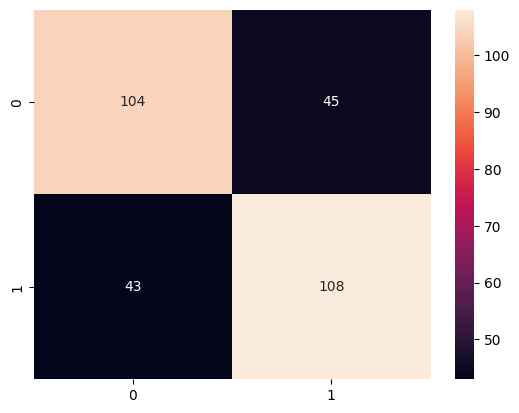

In [9]:
# Confusion matrix
confusion_matrix(y_test, forecast)
sns.heatmap(confusion_matrix(y_test, forecast), fmt="d", annot=True)

## <span style="color: #20C997;">Personal Analysis</span>
With the same dataset, the Decision Tree classification can not get  the same result as Logistic Regression, and  its accuracy is lower than Logistic Regression.But, the Decision Tree shows the same precision for both classes equally (71% for diabetes and 71% for not diabetes). It works better at identifying actual positive cases (diabetes) as its recall for diabetes is a bit higher.
On the other hand, Logistic Regression gets better overall accuracy but works better for diabetes based on  precision than for not diabetes. But, it has a lower recall for diabetes compared to not diabetes, which means it misses more actual positive cases of diabetes.



In [10]:
param_grid = {
   'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 30, 2),
    'min_samples_split': range(2, 40, 2),
    'criterion': ["entropy", "gini"],
    'splitter': ["best"],
    'max_features': ["sqrt", "log2"] 
}
# Decision tree classifier
tree = DecisionTreeClassifier(random_state=1)
# GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='accuracy',
                           cv=5, verbose=True, n_jobs=-1)
start_time = time.time()
grid_search.fit(x_train, y_train)
duration = time.time() - start_time
# Best score and estimator
print(f"Best accuracy for training data: {grid_search.best_score_*100:.2f}%")
print("\nbest params", grid_search.best_params_)

#  Time taken
print(f"\n\nTime taken: {duration:.2f} seconds")

Fitting 5 folds for each of 10260 candidates, totalling 51300 fits
Best accuracy for training data: 80.14%

best params {'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 24, 'splitter': 'best'}


Time taken: 62.45 seconds


In [11]:
grid_search.best_estimator_.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_leaf=5,
                       min_samples_split=24, random_state=1)

In [12]:
train_score = grid_search.best_estimator_.score(x_train, y_train)
test_score = grid_search.best_estimator_.score(x_test, y_test)

In [13]:
prediction = grid_search.best_estimator_.predict(x_test)

In [14]:
print("Best Accuracy for Training Data: {:.2f}%".format(train_score * 100))
print("Test Accuracy for Testing Data: {:.2f}%\n".format(test_score * 100))
# Classification report
print(classification_report(y_test, prediction))

Best Accuracy for Training Data: 84.86%
Test Accuracy for Testing Data: 76.33%

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       149
           1       0.77      0.75      0.76       151

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



<Axes: >

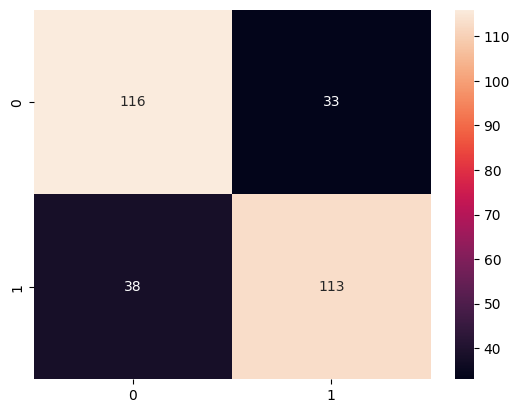

In [15]:
# Confusion matrix
confusion_matrix(y_test, prediction)
sns.heatmap(confusion_matrix(y_test, prediction), fmt="d", annot=True)

## <span style="color: #20C997;">Personal Analysis</span>
Fine Tuned Decision Tree has higher accuracy for Training Data(84.86%) compared to Fined Tuned Logistic Regression(73%). It seems Fine Tuned Decision Tree model is overfitted because accuracy is high for Training Data  <br>
It has higher accuracy for Testing  Data(76%) than actual Decision Tree on the above(71%), but is a bit lower than Fine Tuned Logistic Regression(77.67%).<br>
Fine Tuned model Decision Tree works works better for not diabetes( recall:78% for not diabetes and 75% for diabetes) than actual Decision Tree.<br> 
Now Fined Tuned Decision Tree model works like  actual Logistic Regression and Fine Tuned Logistic Regression Model for Recall.<br>
In general Logistic Regression has better performing than Decision Tree.